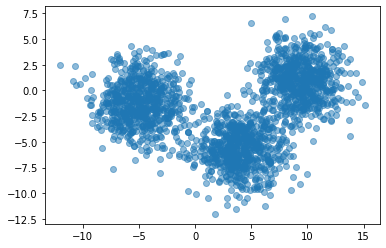

In [37]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = make_blobs(2000, 4, random_state=4, cluster_std=2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.scatter(X[:, 0], X[:, 1], alpha=0.5)

In [38]:
from sklearn.cluster import KMeans

models = [KMeans(k).fit(X, y) for k in range(1, 20)]

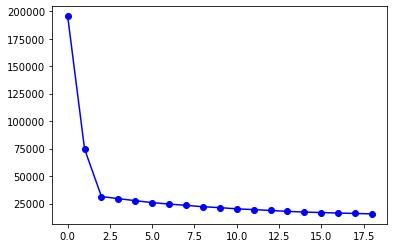

In [39]:
plt.plot([model.inertia_ for model in models], 'bo-')

In [40]:
from sklearn.metrics import silhouette_score

model = KMeans()

model.fit(X, y)

silhouette_score(X, model.labels_)

0.16990695131162512

[0.5738297649036262,
 0.6073330345134351,
 0.4559546353088555,
 0.29491948936876833,
 0.17020402023173656,
 0.17140545592438367,
 0.168165225882538,
 0.16869722831198936,
 0.16714107689949123,
 0.17138656001533387,
 0.17011987275742663,
 0.17403153934654836,
 0.17997872058101178,
 0.1803575206729771,
 0.1790883152750087,
 0.17692711661097618,
 0.17409726460795985,
 0.17355195561809242]

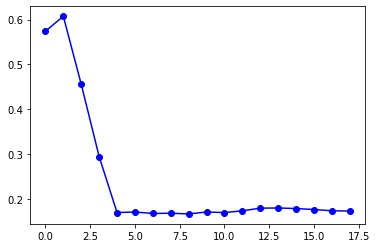

In [41]:
scores = [silhouette_score(X, model.labels_) for model in models[1:]]
plt.plot(scores, 'bo-')

scores

In [42]:
from matplotlib.image import imread

image = imread('./../book/images/unsupervised_learning/ladybug.png')

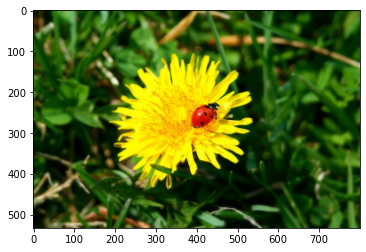

In [43]:
plt.imshow(image)

In [44]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=10).fit(X)

In [45]:
seg_img = kmeans.cluster_centers_[kmeans.labels_]
seg_img = seg_img.reshape(image.shape)

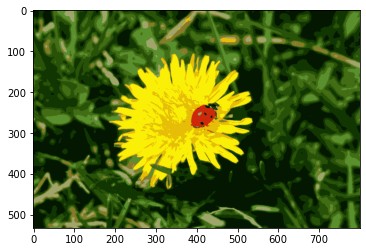

In [46]:
plt.imshow(seg_img)

In [47]:
kmeans.cluster_centers_

array([[0.01711789, 0.09452394, 0.00515264],
       [0.9842006 , 0.94110405, 0.02609219],
       [0.06907566, 0.21274462, 0.01133732],
       [0.5321493 , 0.48597723, 0.16206539],
       [0.15837038, 0.3229202 , 0.03146549],
       [0.90436584, 0.7414613 , 0.03097534],
       [0.80474234, 0.16064048, 0.03952309],
       [0.6297991 , 0.65359604, 0.42229563],
       [0.35307074, 0.5631696 , 0.18080387],
       [0.26112786, 0.42756078, 0.0806594 ]], dtype=float32)

In [48]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)



/Users/nikita_gordia/.conda/envs/Hands_on/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9777777777777777

In [49]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50)),
    ('log_reg', LogisticRegression())
])

pipeline.fit(X_train, y_train)


/Users/nikita_gordia/.conda/envs/Hands_on/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [50]:
pipeline.score(X_test, y_test)

0.9711111111111111

In [51]:
from sklearn.model_selection import GridSearchCV

# grid = GridSearchCV(pipeline, [{
#     'kmeans__n_clusters': range(2, 100)
# }], cv=3, verbose=2)
# grid.fit(X_train, y_train)

In [52]:
# grid.best_params_

In [53]:
# grid.score(X_train, y_train)

In [54]:
import numpy as np

k = 81
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [55]:
from sklearn.datasets import fetch_olivetti_faces

X, y = fetch_olivetti_faces(return_X_y=True)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
X_train.shape

(300, 4096)

In [57]:
# k_array = range(8, 150, 2)
# models = [KMeans(k) for k in k_array]
# for model in models:
#     model.fit(X_train, y_train)
# scores = [silhouette_score(X_train, model.labels_) for model in models]

In [58]:
# argmax = np.array(scores).argmax()
# k_array[argmax]
#
# best_model = models[argmax]
#
# from sklearn.metrics import accuracy_score as acc_sc
#
# 1 - acc_sc(best_model.predict(X_test), y_test)

best_model = KMeans(n_clusters=102)
best_model.fit(X_train, y_train)

KMeans(n_clusters=102)

Text(5, 10, 'hi, nice ass!')

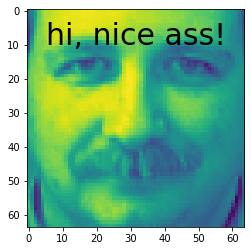

In [59]:
faces_3 = X_train[best_model.labels_ == 3]
plt.imshow(faces_3[0].reshape(64, 64))
plt.text(5, 10, 'hi, nice ass!', fontsize=30)

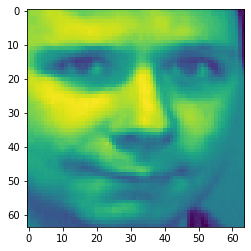

In [60]:
plt.imshow(faces_3[2].reshape(64, 64))

In [61]:
best_model.predict(X_test)

array([ 50,   3,  19,  42,  10,  38,  68,  52,  74,  29,  47,  57,  34,
        46,  92,  57,  14,  10,  32,   8,  13,   2,  16,   0,  20,   3,
        89,  22,  72,  29,  60,  69,  76,  20, 100,  56,  15,  84,  37,
       101,  29,  72,  13,  20,  95,  65,  12,   1,   4,  37,  45,   2,
        59,  79,  44,  92,  50,  99,  58,  24,  30,  73,   2,  63,  15,
        55,  69,   3,  58,  53,  94,  75,  21,  92,  17,  52,   6,  16,
        20,  28,  78,  29,  47,  56,  13,   8,  29,  42,   1,  18,   7,
        54,  17,  54,  18,  26,  94,   6,  26,  25], dtype=int32)

In [62]:
y_test

array([39, 24, 30, 30, 35, 27, 15, 19, 38,  3, 23, 37,  4, 13, 26, 37,  7,
       35, 27, 10,  2,  0, 21, 32,  2, 24, 38, 18,  8,  4, 33, 15, 16, 22,
        1, 18,  5, 25, 13,  7, 12, 22, 20,  3, 31, 31, 25,  8, 38, 13, 20,
        0, 28,  3,  1, 26, 15, 37, 29, 16,  7, 33,  9, 34,  5, 31,  0, 24,
       29, 34, 11, 17,  8, 26,  6, 19, 17, 21, 22, 28,  9, 12, 23, 18, 12,
       10, 14, 30, 39, 14, 20, 32,  6, 32, 14, 36, 11, 17, 36, 36])

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train)

In [64]:
X_test.shape

(100, 4096)

In [65]:
X.shape

(400, 4096)

In [66]:
X_train.shape

(225, 4096)

In [67]:
X_test.shape

(100, 4096)

In [68]:
X_val.shape

(75, 4096)

In [69]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('kmean', KMeans(101)),
    ('rnd_fr', RandomForestClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('kmean', KMeans(n_clusters=101)),
                ('rnd_fr', RandomForestClassifier())])

In [70]:
pipe.score(X_val, y_val)

0.8

In [71]:
rnd_fr = RandomForestClassifier()
rnd_fr.fit(X_train, y_train)
rnd_fr.score(X_val, y_val)

0.8933333333333333

In [72]:
X_train_rd = best_model.transform(X_train)
X_test_rd = best_model.transform(X_test)
X_val_rd = best_model.transform(X_val)

In [76]:
pipe.fit(X_train_rd, y_train)
pipe.score(X_val_rd, y_val)

0.5066666666666667